<a href="https://colab.research.google.com/github/ktzh/NLPhomeworks/blob/main/Lecture01_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [ ]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

#z = zipfile.ZipFile("../data/athlete_events.zip")
df = pd.read_csv(open("/content/athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [ ]:
df.shape

(30181, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [ ]:
#new_df = df[['Sex', 'Medal']]
#df[['Sex', 'Medal']].head(3)
#df[(df['Sex'] == 'M') & (df['Medal'] == 'Gold')].value_counts()
#df['Medal'].value_counts()
#df['Sex'].value_counts()
pd.crosstab(df['Sex'], df['Medal'], margins=True)

Medal,Bronze,Gold,Silver,All
Sex,,,,
F,3475,3437,3438,10350
M,6673,6730,6428,19831
All,10148,10167,9866,30181


**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [ ]:
df[(df['Medal'] == 'Gold')]['Team'].value_counts().head(1)

,count
Team,
United States,2075


**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [ ]:
pd.crosstab(df['Sex'], df['Sport'], margins=True)

Sport,Alpine Skiing,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,Biathlon,Bobsleigh,...,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,180,100,0,1239,73,0,390,35,147,24,...,72,84,14,15,0,469,191,105,68,10350
M,174,106,2,2409,81,333,610,33,241,259,...,72,89,15,15,8,489,573,427,899,19831
All,354,206,2,3648,154,333,1000,68,388,283,...,144,173,29,30,8,958,764,532,967,30181


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [ ]:
df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]['Age'].agg([
    np.mean, np.std,
])

<ipython-input-13-50615bf3df7b>:1: FutureWarning: The provided callable <function mean at 0x7f10921bd3a0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]['Age'].agg([
<ipython-input-13-50615bf3df7b>:1: FutureWarning: The provided callable <function std at 0x7f10921bd4e0> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]['Age'].agg([


,Age
mean,24.420000
std,4.360464


**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [ ]:
df[(df['Medal'] == 'Bronze')&(df['Sex'] == 'F')]['Team'].value_counts().head(1)

,count
Team,
United States,360


**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

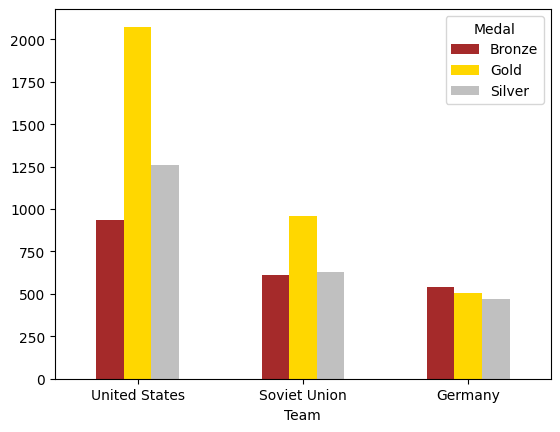

In [ ]:
crosstab = pd.crosstab(df['Team'], df['Medal'], margins=True)
#crosstab
crosstab_f = crosstab.sort_values (by = 'All', ascending=False)[1:4]
crosstab_f.drop(['All'], axis=1, inplace=True)
crosstab_f.plot(kind='bar', rot=0, color=['brown', 'gold','silver']);


**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль (density или distplot)**

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

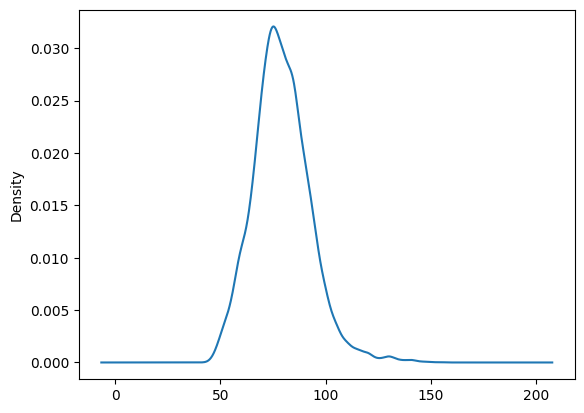

In [ ]:
filter_df = df[(df['Sex'] == 'M') & (df['Medal'] == 'Silver')]
filter_df.head()
filter_df['Weight'].plot(kind='density');

**8. Постройте boxplot для возраста участника в зависимости от медали**

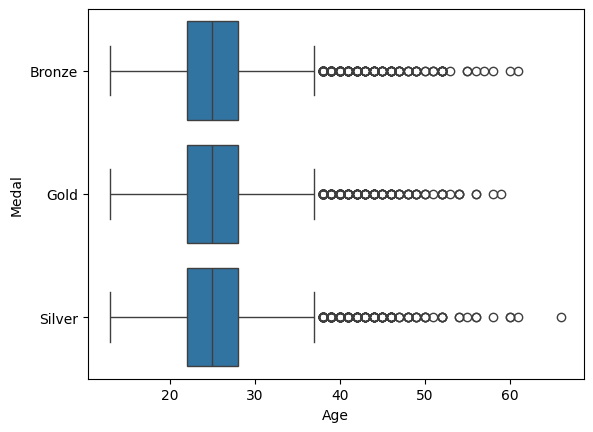

In [ ]:
sns.boxplot(y="Medal", x="Age",
            data=df, orient="h");

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

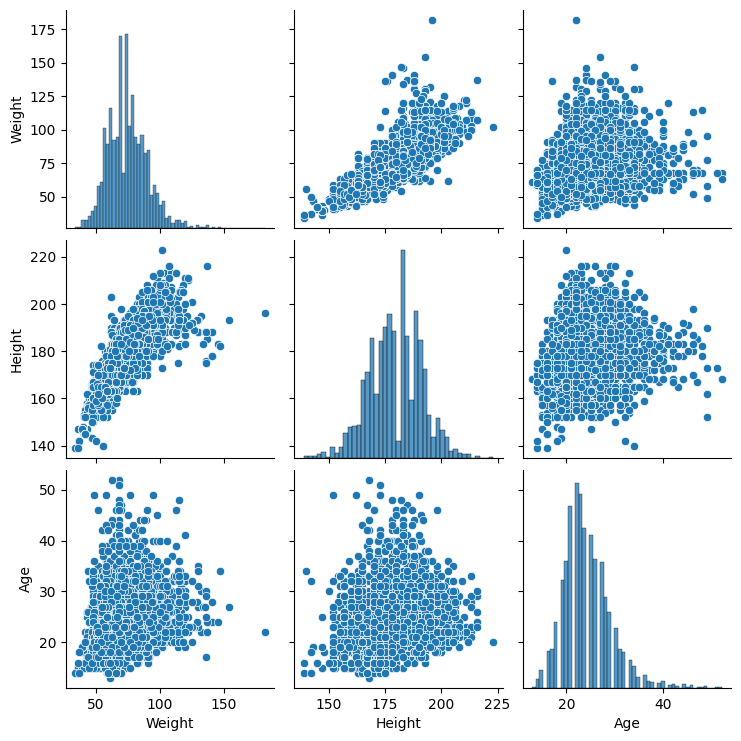

In [ ]:
df_usa = df[(df['Team'] == 'United States')]
#df_usa.head()
sns.pairplot(df_usa[['Weight', 'Height','Age']]);